In [1]:
import sys
import os

# Add the 'src' directory to the Python path
sys.path.insert(0, os.path.abspath('../src'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loader import DataLoader

# 1. Import Data Using SQL

In [3]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [4]:
# SQL Query
# Combine 5 tables, will drop unnecessary columns using python later.

df = DataLoader().query("""
SELECT 
    churn.*, 
    acc.*, 
    ause.*, 
    cust.*, 
    city.*
FROM 
    churn_status AS churn
LEFT JOIN 
    account AS acc ON churn.customer_id = acc.customer_id
LEFT JOIN 
    account_usage AS ause ON acc.account_id = ause.account_id
LEFT JOIN 
    customer AS cust ON churn.customer_id = cust.customer_id
LEFT JOIN 
    city ON cust.zip_code = city.zip_code;
""")

df.head()

,customer_id,status,churn_label,churn_category,churn_reason,account_id,customer_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,account_id,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,customer_id,gender,age,senior_citizen,married,num_dependents,zip_code,area_id,zip_code,city,latitutde,longitude,population
0,0013-EXCHZ,Churned,Yes,Dissatisfaction,Network reliability,BFIN-DLMOA,0013-EXCHZ,3,3,Yes,Fiber Optic,Yes,Yes,No,Yes,No,No,No,Month-to-Month,Yes,Credit Card,BFIN-DLMOA,7.38,22.14,11,Yes,No,No,83.90,267.40,0.0,0013-EXCHZ,Female,75,Yes,Yes,0,93010,607,93010,Camarillo,34.227846,-119.079903,42853
1,0014-BMAQU,Stayed,No,,,AFEO-XOOCP,0014-BMAQU,63,8,Yes,Fiber Optic,No,Yes,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,AFEO-XOOCP,12.96,816.48,7,No,No,No,84.65,5377.80,0.0,0014-BMAQU,Male,52,No,Yes,0,94558,963,94558,Napa,38.489789,-122.270110,63947
2,0016-QLJIS,Stayed,No,,,DEMQ-MFXWC,0016-QLJIS,65,3,Yes,Cable,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,DEMQ-MFXWC,28.46,1849.90,14,Yes,Yes,Yes,90.45,5957.90,0.0,0016-QLJIS,Female,43,No,Yes,1,95681,1390,95681,Sheridan,38.984756,-121.345074,1219
3,0019-EFAEP,Stayed,No,,,AIPP-VTDXJ,0019-EFAEP,72,0,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,AIPP-VTDXJ,2.25,162.00,16,Yes,No,No,101.30,7261.25,0.0,0019-EFAEP,Female,32,No,No,0,91942,303,91942,La Mesa,32.782501,-117.016110,24005
4,0019-GFNTW,Stayed,No,,,CJHA-SRKIB,0019-GFNTW,56,0,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,CJHA-SRKIB,0.00,0.00,19,No,No,No,45.05,2560.10,0.0,0019-GFNTW,Female,39,No,No,0,93441,716,93441,Los Olivos,34.704340,-120.026090,1317


In [5]:
# Drop duplicated columns (customer_id, account_id, zip_code)
df = df.T.drop_duplicates().T
df.head()

,customer_id,status,churn_label,churn_category,churn_reason,account_id,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,gender,age,senior_citizen,married,num_dependents,zip_code,area_id,city,latitutde,longitude,population
0,0013-EXCHZ,Churned,Yes,Dissatisfaction,Network reliability,BFIN-DLMOA,3,3,Yes,Fiber Optic,Yes,Yes,No,Yes,No,No,No,Month-to-Month,Yes,Credit Card,7.38,22.14,11,Yes,No,No,83.9,267.4,0.0,Female,75,Yes,Yes,0,93010,607,Camarillo,34.227846,-119.079903,42853
1,0014-BMAQU,Stayed,No,,,AFEO-XOOCP,63,8,Yes,Fiber Optic,No,Yes,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,12.96,816.48,7,No,No,No,84.65,5377.8,0.0,Male,52,No,Yes,0,94558,963,Napa,38.489789,-122.27011,63947
2,0016-QLJIS,Stayed,No,,,DEMQ-MFXWC,65,3,Yes,Cable,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,28.46,1849.9,14,Yes,Yes,Yes,90.45,5957.9,0.0,Female,43,No,Yes,1,95681,1390,Sheridan,38.984756,-121.345074,1219
3,0019-EFAEP,Stayed,No,,,AIPP-VTDXJ,72,0,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,2.25,162.0,16,Yes,No,No,101.3,7261.25,0.0,Female,32,No,No,0,91942,303,La Mesa,32.782501,-117.01611,24005
4,0019-GFNTW,Stayed,No,,,CJHA-SRKIB,56,0,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,0.0,0.0,19,No,No,No,45.05,2560.1,0.0,Female,39,No,No,0,93441,716,Los Olivos,34.70434,-120.02609,1317


# 2. EDA & Data Cleaning

First, let's correct the typo in the latitude column name.

In [6]:
# There's typo in the latitutde column name. We will rename it correctly.
df.rename(columns={'latitutde':'latitude'}, inplace=True)

Next, let's examine some columns that might not provide additional useful information.

In [7]:
# Check if each customer has unique customer_id and account_id/
print(df.shape)
print(df['customer_id'].nunique())
print(df['account_id'].nunique())

(7043, 40)
7043
7043


In [8]:
# Drop columns that have no additional useful information.
# We also drop area_id, we will use other columns for location.
df.drop(columns=['customer_id', 'account_id', 'area_id'], inplace=True)

Next, we examine status and churn_label columns

In [9]:
# Comparing status and churn_label
print(df['status'].value_counts(), '\n')
print(df['churn_label'].value_counts())

status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64 

churn_label
No     5174
Yes    1817
         52
Name: count, dtype: int64


The total counts of status and churn_label do not match. Let's investigate the reason.

In [10]:
# Check churn_label unique values.
df.churn_label.unique()

array(['Yes', 'No', ''], dtype=object)

In [11]:
# There're some '' values, let's replace '' with null.
df.replace('', None, inplace=True)

# Check the null label status.
df[['status','churn_label']][df['churn_label'].isnull()]

,status,churn_label
25,Churned,None
95,Churned,None
167,Churned,None
344,Churned,None
653,Churned,None
944,Churned,None
1050,Churned,None
1076,Churned,None
1109,Churned,None
1398,Churned,None


All the null values have a Churned status. We will replace these null values with "Yes."

In [12]:
# Replace null with Yes
df['churn_label'].fillna('Yes', inplace=True)

print(df['status'].value_counts(), '\n')
print(df['churn_label'].value_counts())

status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64 

churn_label
No     5174
Yes    1869
Name: count, dtype: int64


C:\Users\MichaelKS\AppData\Local\Temp\ipykernel_15676\3981691191.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['churn_label'].fillna('Yes', inplace=True)


Now status and churn_label count matches. Let's drop status.

In [13]:
# Drop status.
df.drop(columns=['status'], inplace=True)

Let's take a look at df info.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   churn_label                    7043 non-null   object
 1   churn_category                 1869 non-null   object
 2   churn_reason                   1869 non-null   object
 3   tenure_months                  7043 non-null   object
 4   num_referrals                  7043 non-null   object
 5   has_internet_service           7043 non-null   object
 6   internet_type                  7043 non-null   object
 7   has_unlimited_data             7043 non-null   object
 8   has_phone_service              7043 non-null   object
 9   has_multiple_lines             7043 non-null   object
 10  has_premium_tech_support       7043 non-null   object
 11  has_online_security            7043 non-null   object
 12  has_online_backup              7043 non-null   object
 13  has

We can identify two issues here, the presence of missing values and the fact that all column data types are strings.

First, let's address the missing values
Given the missing values in **churn_category** and **churn_reason**, these columns might not be useful for our initial model and can be dropped.  

In [15]:
# Drop churn_category and churn_reason columns.
df.drop(columns=['churn_category', 'churn_reason'], inplace=True)

Next we will convert numeric columns to int or float data type.

In [16]:
# Find numeric columns.
num_col = [item for item in df.columns if item not in df.apply(pd.to_numeric, errors='coerce').columns[df.apply(pd.to_numeric, errors='coerce').isnull().any()].tolist()]

In [17]:
# Convert numeric columns to int or float data type.
df[num_col] = df[num_col].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn_label                    7043 non-null   object 
 1   tenure_months                  7043 non-null   int64  
 2   num_referrals                  7043 non-null   int64  
 3   has_internet_service           7043 non-null   object 
 4   internet_type                  7043 non-null   object 
 5   has_unlimited_data             7043 non-null   object 
 6   has_phone_service              7043 non-null   object 
 7   has_multiple_lines             7043 non-null   object 
 8   has_premium_tech_support       7043 non-null   object 
 9   has_online_security            7043 non-null   object 
 10  has_online_backup              7043 non-null   object 
 11  has_device_protection          7043 non-null   object 
 12  contract_type                  7043 non-null   o

We can see that zip_code data type is int, it should be a categorical feature. Let's convert it.

In [18]:
# Convert zip_code to categorical
df['zip_code'] = df['zip_code'].astype(str)

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure_months,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
num_referrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
avg_long_distance_fee_monthly,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
total_long_distance_fee,7043.0,749.099262,846.660055,0.000000,70.545000,401.440000,1191.100000,3564.720000
avg_gb_download_monthly,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000
total_monthly_fee,7043.0,64.761692,30.090047,18.250000,35.500000,70.350000,89.850000,118.750000
total_charges_quarter,7043.0,2280.381264,2266.220462,18.800000,400.150000,1394.550000,3786.600000,8684.800000
total_refunds,7043.0,1.962182,7.902614,0.000000,0.000000,0.000000,0.000000,49.790000
age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
num_dependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000


In [20]:
df.head()

,churn_label,tenure_months,num_referrals,has_internet_service,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,gender,age,senior_citizen,married,num_dependents,zip_code,city,latitude,longitude,population
0,Yes,3,3,Yes,Fiber Optic,Yes,Yes,No,Yes,No,No,No,Month-to-Month,Yes,Credit Card,7.38,22.14,11,Yes,No,No,83.90,267.40,0.0,Female,75,Yes,Yes,0,93010,Camarillo,34.227846,-119.079903,42853
1,No,63,8,Yes,Fiber Optic,No,Yes,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,12.96,816.48,7,No,No,No,84.65,5377.80,0.0,Male,52,No,Yes,0,94558,Napa,38.489789,-122.270110,63947
2,No,65,3,Yes,Cable,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,28.46,1849.90,14,Yes,Yes,Yes,90.45,5957.90,0.0,Female,43,No,Yes,1,95681,Sheridan,38.984756,-121.345074,1219
3,No,72,0,Yes,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,2.25,162.00,16,Yes,No,No,101.30,7261.25,0.0,Female,32,No,No,0,91942,La Mesa,32.782501,-117.016110,24005
4,No,56,0,Yes,DSL,Yes,No,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,0.00,0.00,19,No,No,No,45.05,2560.10,0.0,Female,39,No,No,0,93441,Los Olivos,34.704340,-120.026090,1317


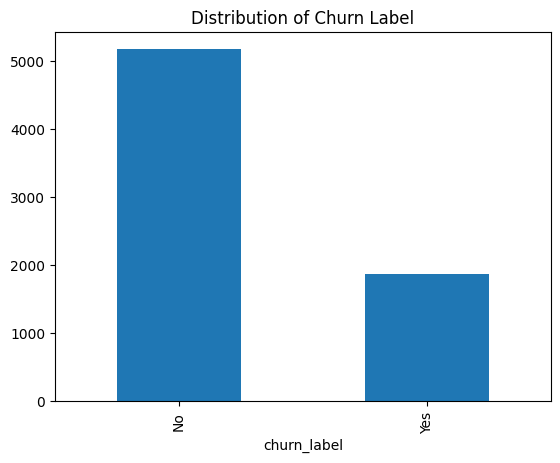

In [21]:
import matplotlib.pyplot as plt
df['churn_label'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn Label')
plt.show()

We will modify churn_label to 0 and 1

In [22]:
df['churn_label'] = df['churn_label'].apply(lambda x: 1 if x=='Yes' else 0)
df['churn_label'].value_counts()

churn_label
0    5174
1    1869
Name: count, dtype: int64

We will use the zip_code since it provides more coverage than the city and is more intuitive than using longitude and latitude.  
Let's drop the city, latitude, and longitude columns.

In [23]:
df = df.drop(columns=['city', 'longitude', 'latitude'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn_label                    7043 non-null   int64  
 1   tenure_months                  7043 non-null   int64  
 2   num_referrals                  7043 non-null   int64  
 3   has_internet_service           7043 non-null   object 
 4   internet_type                  7043 non-null   object 
 5   has_unlimited_data             7043 non-null   object 
 6   has_phone_service              7043 non-null   object 
 7   has_multiple_lines             7043 non-null   object 
 8   has_premium_tech_support       7043 non-null   object 
 9   has_online_security            7043 non-null   object 
 10  has_online_backup              7043 non-null   object 
 11  has_device_protection          7043 non-null   object 
 12  contract_type                  7043 non-null   o

Let's take a look at numeric columns correlation matrix.

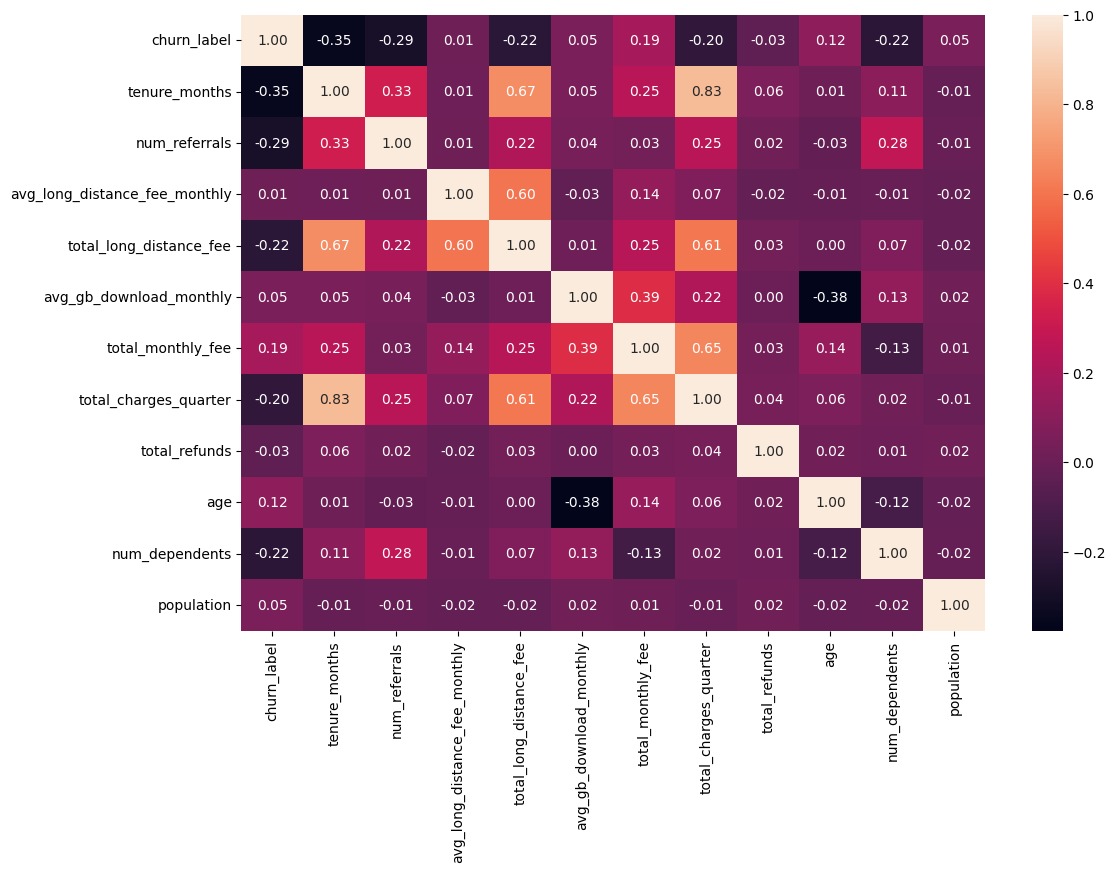

In [25]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt='.2f')
plt.show()

From the correlation matrix above, we can see that the correlations are moderate or lower.  
The tenure_months variable has the highest correlation of -0.35, followed by num_referrals, total_long_distance_fee, and num_dependents.

Next let's take a look at categorical features Chi-Square results

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

# Select categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# Encode categorical features
df_encoded = df.copy()
for feature in categorical_features:
    df_encoded[feature] = LabelEncoder().fit_transform(df_encoded[feature].astype(str))

# Apply Chi-Square test
X_categorical = df_encoded[categorical_features]
y = df_encoded['churn_label']
chi_scores = chi2(X_categorical, y)

# Create a DataFrame to print the results
chi2_results = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2_Score': chi_scores[0],
    'P_Value': chi_scores[1]
}).sort_values(by='Chi2_Score', ascending=False)

chi2_results

,Feature,Chi2_Score,P_Value
9,contract_type,1273.246919,7.363558e-279
18,zip_code,1021.185450,4.460263e-224
6,has_online_security,147.295858,6.761696e-34
5,has_premium_tech_support,135.559783,2.490549e-31
16,senior_citizen,134.351545,4.576959e-31
10,paperless_billing,105.680863,8.661987e-25
11,payment_method,92.448101,6.911369e-22
17,married,82.412083,1.104764e-19
0,has_internet_service,79.251371,5.468939e-19
2,has_unlimited_data,63.740022,1.419708e-15


From the results above, we can see that the city has the strongest association with the contract type, followed by zip_code and has_online_security.

Let's take a look at the distribution as well.

c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Use

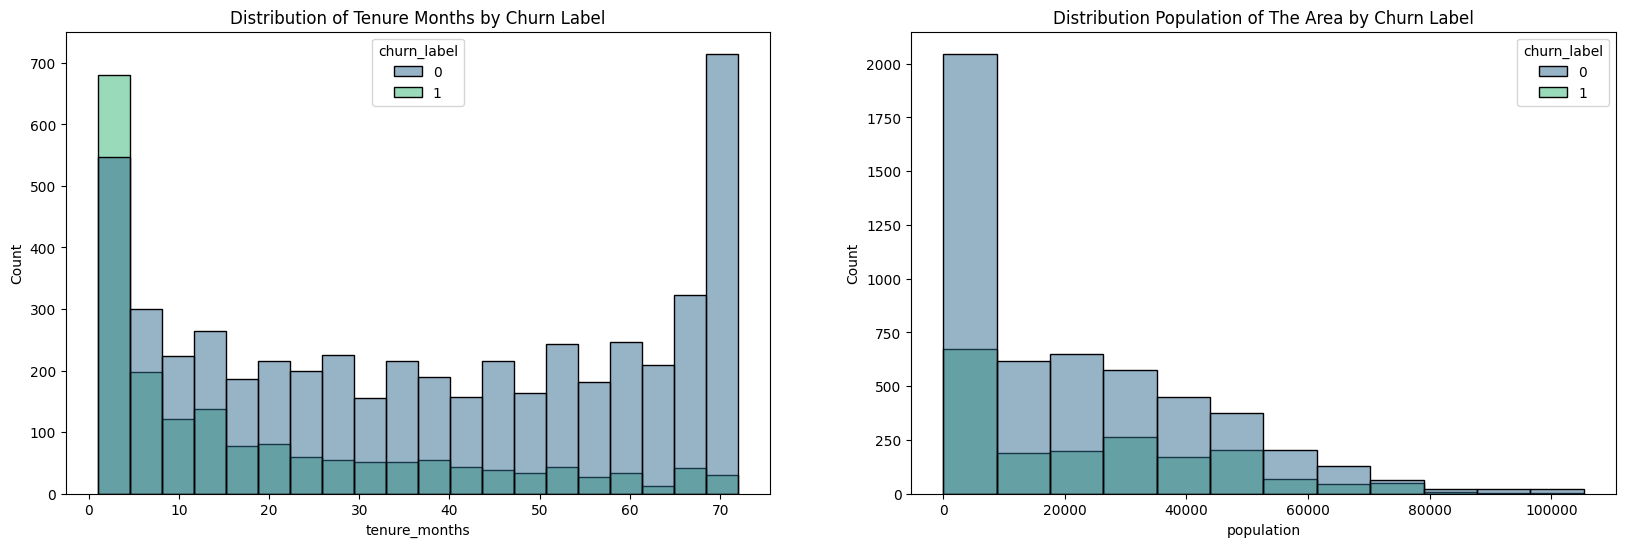

In [27]:
# Check distribution by churn_label.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(df, x='tenure_months', hue='churn_label', bins=20, palette='viridis', ax=ax[0])
ax[0].set_title('Distribution of Tenure Months by Churn Label')

sns.histplot(df, x='population', hue='churn_label', bins=12, palette='viridis', ax=ax[1])
ax[1].set_title('Distribution Population of The Area by Churn Label')
plt.show()

We can observe a slight trend in tenure_months: the longer the tenure, the lower the churn rate.  
We can see most of our customers are primarily located in less densely populated area.

c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Use

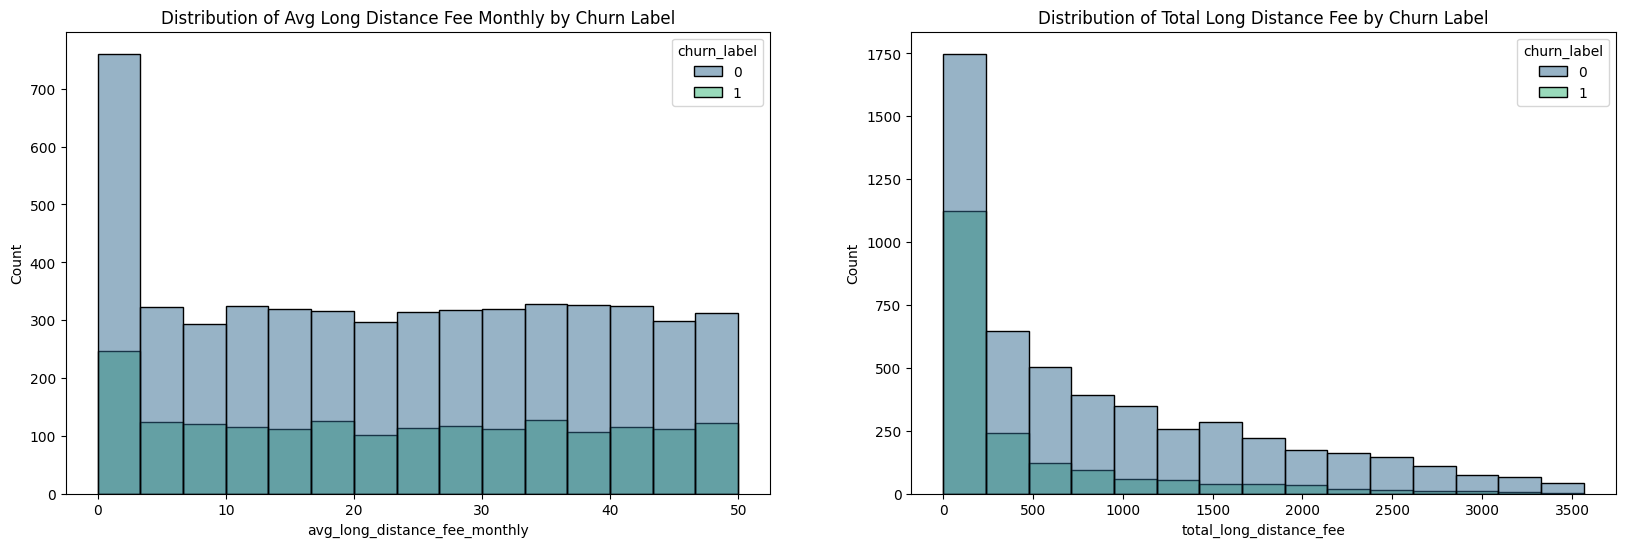

In [28]:
# Check distribution by churn_label.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(df, x='avg_long_distance_fee_monthly', hue='churn_label', bins=15, palette='viridis', ax=ax[0])
ax[0].set_title('Distribution of Avg Long Distance Fee Monthly by Churn Label')

sns.histplot(df, x='total_long_distance_fee', hue='churn_label', bins=15, palette='viridis', ax=ax[1])
ax[1].set_title('Distribution of Total Long Distance Fee by Churn Label')
plt.show()

We can observe that the churn rate across the avg_long_distance_fee_monthly distribution is approximately 40-50%.  
And the proportion of churned customers seems relatively lower in higher total_long_distance_fee ranges.

c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Use

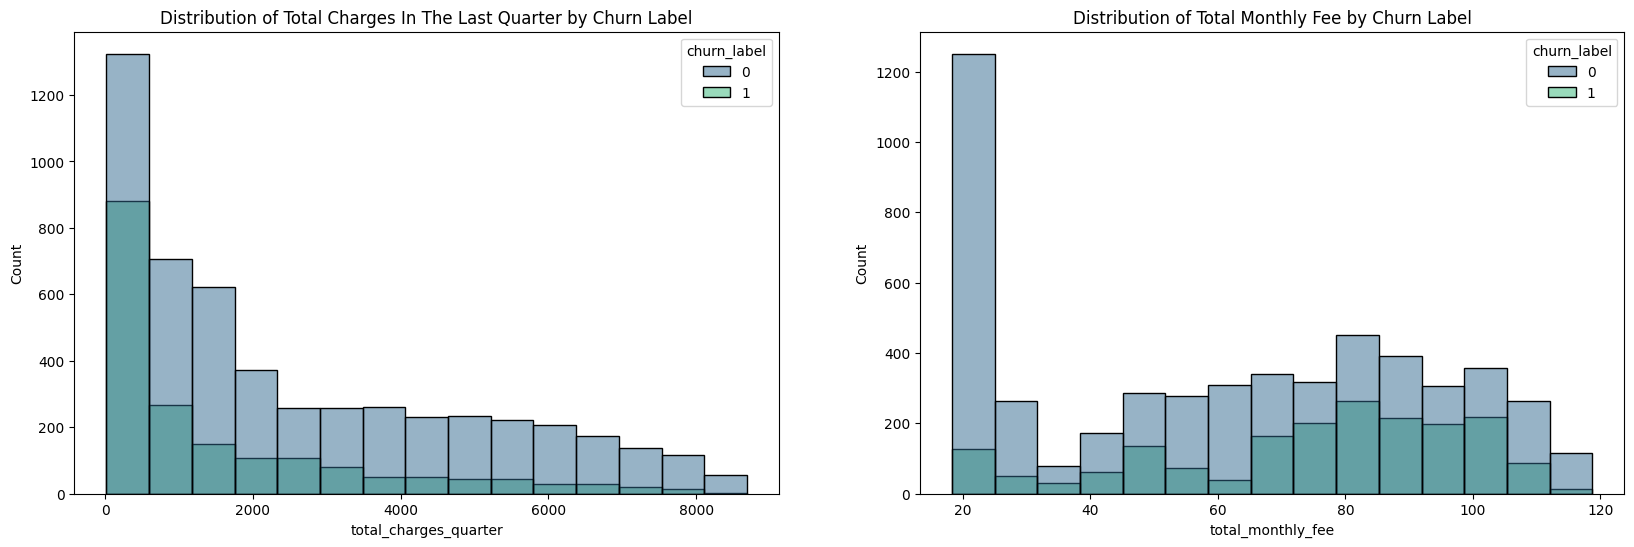

In [29]:
# Check distribution by churn_label.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(df, x='total_charges_quarter', hue='churn_label', bins=15, palette='viridis', ax=ax[0])
ax[0].set_title('Distribution of Total Charges In The Last Quarter by Churn Label')

sns.histplot(df, x='total_monthly_fee', hue='churn_label', bins=15, palette='viridis', ax=ax[1])
ax[1].set_title('Distribution of Total Monthly Fee by Churn Label')
plt.show()

As the total_charges_quarter increase, the number of customers decreases, but the proportion of churned customers becomes less prominent.  
For the total_monthly_fee, it has lower churn rate at the lower fee.

c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\MichaelKS\github\cutomer_churn_flask_app_aws\venv\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Use

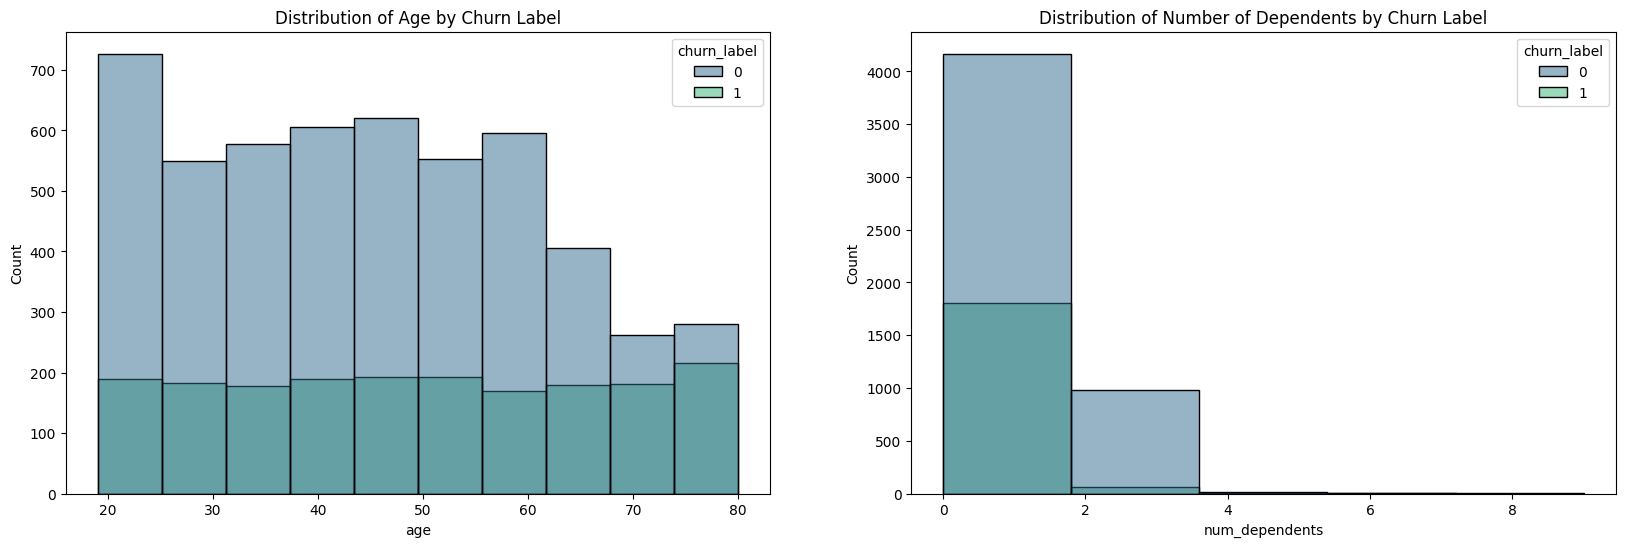

In [30]:
# Check distribution by churn_label.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(df, x='age', hue='churn_label', bins=10, palette='viridis', ax=ax[0])
ax[0].set_title('Distribution of Age by Churn Label')

sns.histplot(df, x='num_dependents', hue='churn_label', bins=5, palette='viridis', ax=ax[1])
ax[1].set_title('Distribution of Number of Dependents by Churn Label')
plt.show()

It appears that older adults have a higher churn rate.  
Additionally, the churn rate is quite high for people without dependents.  
Since we have age, we will drop senior_citizen column.

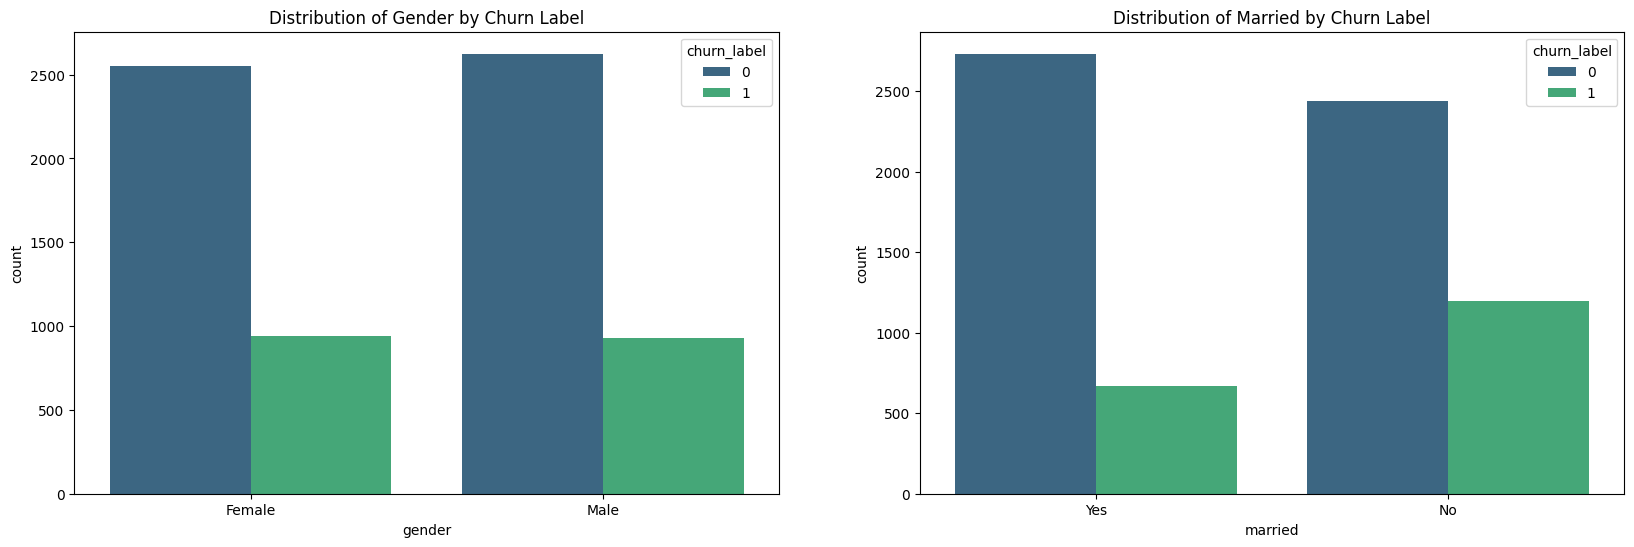

In [31]:
# Check distribution by churn_label.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(df, x='gender', hue='churn_label', palette='viridis', ax=ax[0])
ax[0].set_title('Distribution of Gender by Churn Label')

sns.countplot(df, x='married', hue='churn_label', palette='viridis', ax=ax[1])
ax[1].set_title('Distribution of Married by Churn Label')
plt.show()

Both males and females have similar churn rates.  
Additionally, single individuals have a higher churn rate.

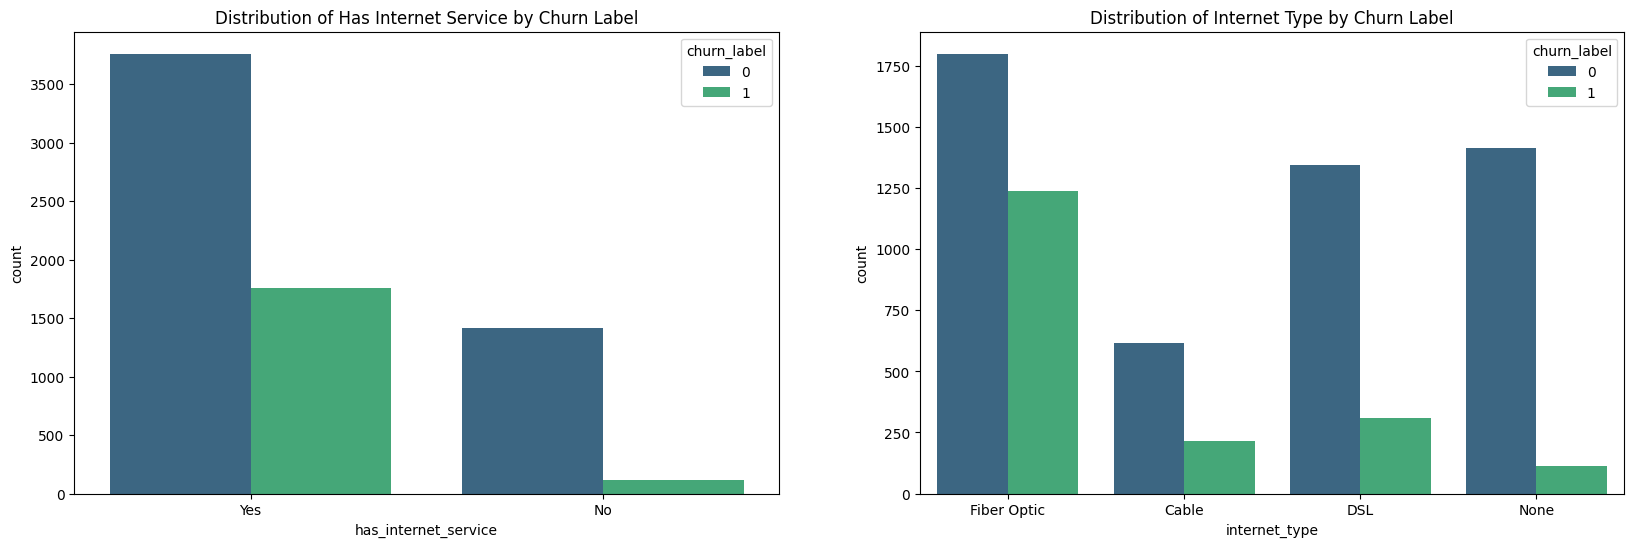

In [32]:
# Check distribution by churn_label.
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.countplot(df, x='has_internet_service', hue='churn_label', palette='viridis', ax=ax[0])
ax[0].set_title('Distribution of Has Internet Service by Churn Label')

sns.countplot(df, x='internet_type', hue='churn_label', palette='viridis', ax=ax[1])
ax[1].set_title('Distribution of Internet Type by Churn Label')
plt.show()

The churn rate is higher for customers with internet service, with fiber optic having the highest churn rate among the different types of internet.  
We will use the internet_type column and drop the has_internet_service column.

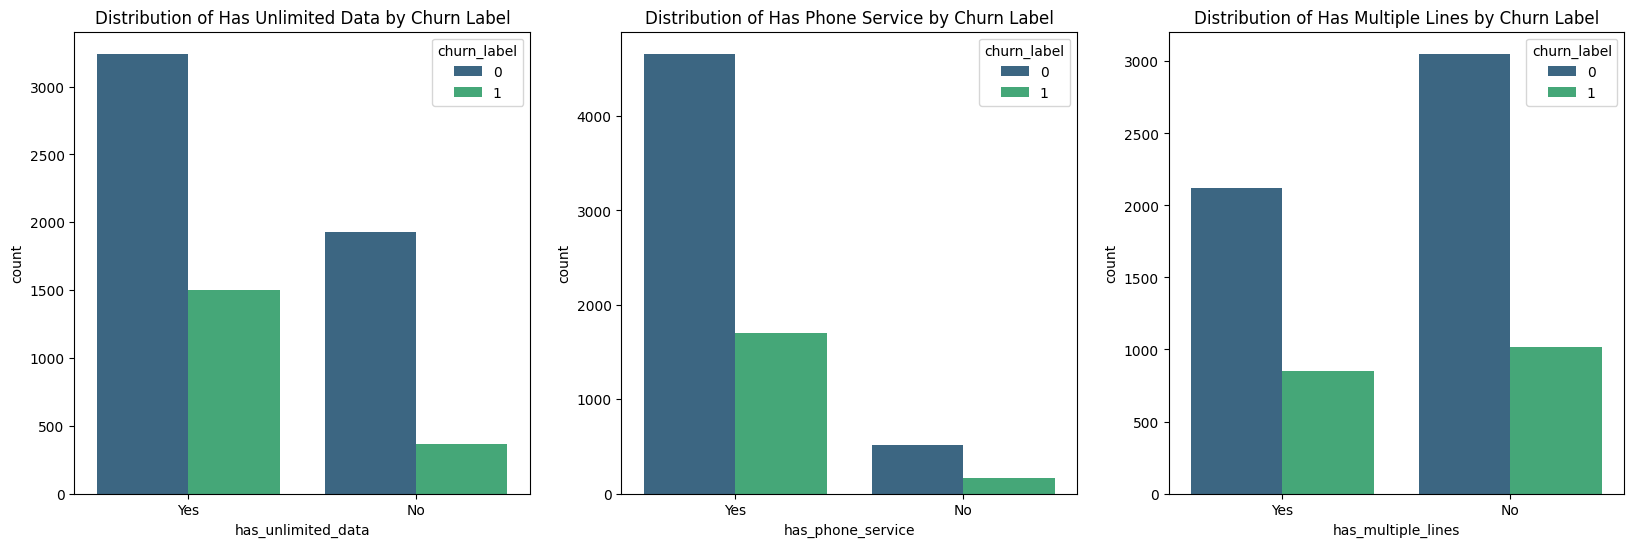

In [33]:
# Check distribution by churn_label.
order = ['Yes', 'No']

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.countplot(df, x='has_unlimited_data', hue='churn_label', palette='viridis', order=order, ax=ax[0])
ax[0].set_title('Distribution of Has Unlimited Data by Churn Label')

sns.countplot(df, x='has_phone_service', hue='churn_label', palette='viridis', order=order, ax=ax[1])
ax[1].set_title('Distribution of Has Phone Service by Churn Label')

sns.countplot(df, x='has_multiple_lines', hue='churn_label', palette='viridis', order=order, ax=ax[2])
ax[2].set_title('Distribution of Has Multiple Lines by Churn Label')
plt.show()

Customers with unlimited data have an approximately 50% chance of churning. And the churn rate for customers with multiple lines is also higher.

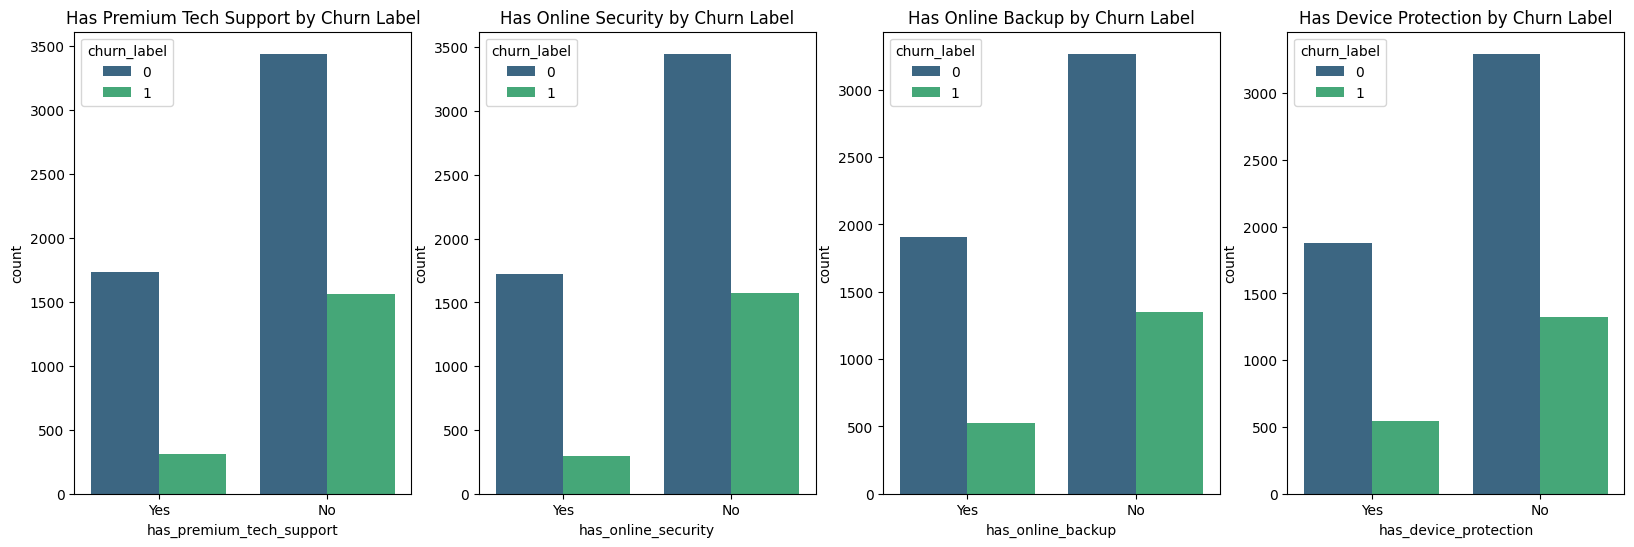

In [34]:
# Check distribution by churn_label.
order = ['Yes', 'No']

fig, ax = plt.subplots(1, 4, figsize=(20, 6))
sns.countplot(df, x='has_premium_tech_support', hue='churn_label', palette='viridis', order=order, ax=ax[0])
ax[0].set_title('Has Premium Tech Support by Churn Label')

sns.countplot(df, x='has_online_security', hue='churn_label', palette='viridis', order=order, ax=ax[1])
ax[1].set_title('Has Online Security by Churn Label')

sns.countplot(df, x='has_online_backup', hue='churn_label', palette='viridis', order=order, ax=ax[2])
ax[2].set_title('Has Online Backup by Churn Label')

sns.countplot(df, x='has_device_protection', hue='churn_label', palette='viridis', order=order, ax=ax[3])
ax[3].set_title('Has Device Protection by Churn Label')
plt.show()

From the graph above, we can see that more tech-savvy customers have a lower rate of churn.

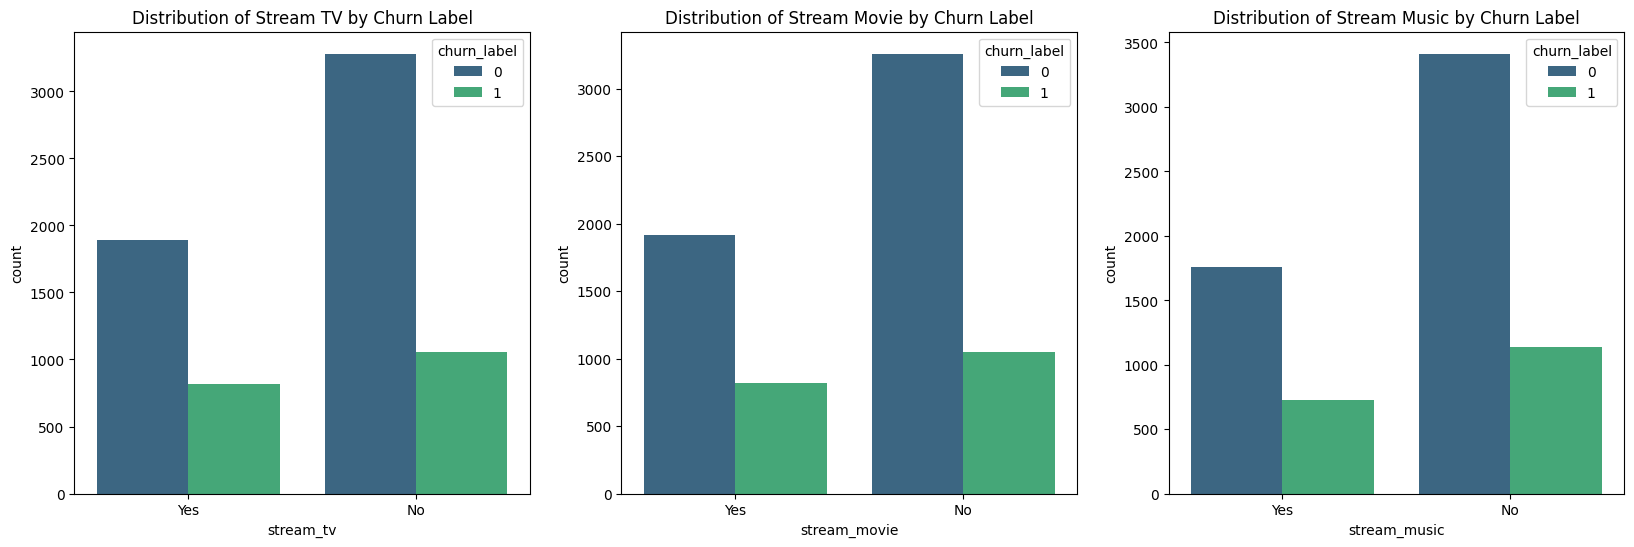

In [35]:
# Check distribution by churn_label.
order = ['Yes', 'No']

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.countplot(df, x='stream_tv', hue='churn_label', palette='viridis', order=order, ax=ax[0])
ax[0].set_title('Distribution of Stream TV by Churn Label')

sns.countplot(df, x='stream_movie', hue='churn_label', palette='viridis', order=order, ax=ax[1])
ax[1].set_title('Distribution of Stream Movie by Churn Label')

sns.countplot(df, x='stream_music', hue='churn_label', palette='viridis', order=order, ax=ax[2])
ax[2].set_title('Distribution of Stream Music by Churn Label')
plt.show()

Customers who stream TV, movies, and music have a higher churn rate.

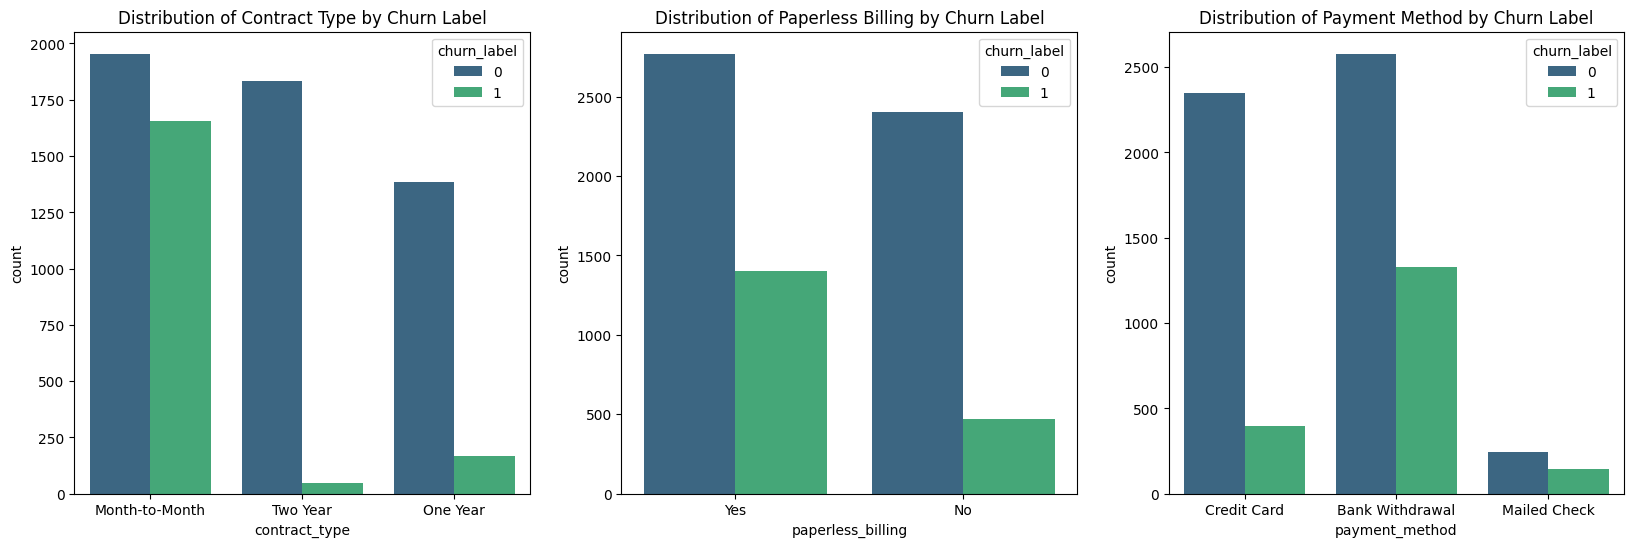

In [36]:
# Check distribution by churn_label.
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.countplot(df, x='contract_type', hue='churn_label', palette='viridis', ax=ax[0])
ax[0].set_title('Distribution of Contract Type by Churn Label')

sns.countplot(df, x='paperless_billing', hue='churn_label', palette='viridis', ax=ax[1])
ax[1].set_title('Distribution of Paperless Billing by Churn Label')

sns.countplot(df, x='payment_method', hue='churn_label', palette='viridis', ax=ax[2])
ax[2].set_title('Distribution of Payment Method by Churn Label')
plt.show()

Customers with month-to-month contracts have a significantly higher churn rate compared to other contract types.  
Additionally, customers who opt for paperless billing are more likely to churn.  
Lastly, while payment by mailed check is the least popular, it has the highest churn rate. In contrast, payment by credit card has the lowest churn rate.

Next we will drop some columns as we talked about it earlier

In [37]:
df.drop(columns=['senior_citizen', 'has_internet_service'],inplace=True)

df.shape

(7043, 29)

In [38]:
df.head()

,churn_label,tenure_months,num_referrals,internet_type,has_unlimited_data,has_phone_service,has_multiple_lines,has_premium_tech_support,has_online_security,has_online_backup,has_device_protection,contract_type,paperless_billing,payment_method,avg_long_distance_fee_monthly,total_long_distance_fee,avg_gb_download_monthly,stream_tv,stream_movie,stream_music,total_monthly_fee,total_charges_quarter,total_refunds,gender,age,married,num_dependents,zip_code,population
0,1,3,3,Fiber Optic,Yes,Yes,No,Yes,No,No,No,Month-to-Month,Yes,Credit Card,7.38,22.14,11,Yes,No,No,83.90,267.40,0.0,Female,75,Yes,0,93010,42853
1,0,63,8,Fiber Optic,No,Yes,Yes,Yes,Yes,No,No,Two Year,Yes,Credit Card,12.96,816.48,7,No,No,No,84.65,5377.80,0.0,Male,52,Yes,0,94558,63947
2,0,65,3,Cable,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,28.46,1849.90,14,Yes,Yes,Yes,90.45,5957.90,0.0,Female,43,Yes,1,95681,1219
3,0,72,0,Fiber Optic,Yes,Yes,Yes,No,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,2.25,162.00,16,Yes,No,No,101.30,7261.25,0.0,Female,32,No,0,91942,24005
4,0,56,0,DSL,Yes,No,No,Yes,Yes,Yes,Yes,Two Year,No,Bank Withdrawal,0.00,0.00,19,No,No,No,45.05,2560.10,0.0,Female,39,No,0,93441,1317


# 3. Data Preprocessing & Model Training

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier, plot_importance
import xgboost as xgb
from catboost import CatBoostClassifier

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   churn_label                    7043 non-null   int64  
 1   tenure_months                  7043 non-null   int64  
 2   num_referrals                  7043 non-null   int64  
 3   internet_type                  7043 non-null   object 
 4   has_unlimited_data             7043 non-null   object 
 5   has_phone_service              7043 non-null   object 
 6   has_multiple_lines             7043 non-null   object 
 7   has_premium_tech_support       7043 non-null   object 
 8   has_online_security            7043 non-null   object 
 9   has_online_backup              7043 non-null   object 
 10  has_device_protection          7043 non-null   object 
 11  contract_type                  7043 non-null   object 
 12  paperless_billing              7043 non-null   o

We will compare two models: XGBoost and CatBoost.

## 3.1 XGBoost

First, let's run CatBoost with all the features to find the feature importance.

In [41]:
# Set X and y
X = df.drop(columns=['churn_label'])
y = df['churn_label']

In [42]:
# Convert categorical features to 'category' data type
cat_features = list(X.select_dtypes(include=['object']).columns)

X[cat_features] = X[cat_features].astype('category')

In [43]:
# Convert the DataFrame to DMatrix, specifying categorical features
train_dmatrix = xgb.DMatrix(X, label=y, enable_categorical=True)

In [44]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 4,
    'learning_rate': 0.1,
    'n_estimators': 500,
    'eval_metric': 'auc',
    'enable_categorical': True
}

In [45]:
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100)

[15:01:04] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "enable_categorical", "n_estimators" } are not used.



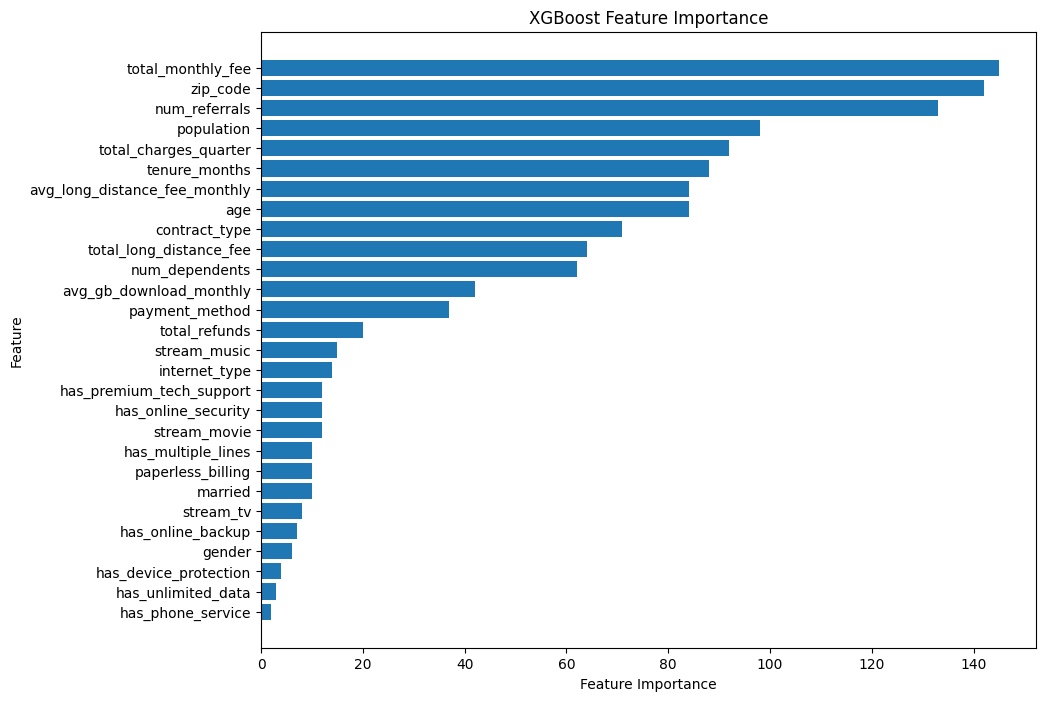

In [46]:
# Check feature importance
feature_importance = xgb_model.get_score(importance_type='weight')

# Sort feature importance by descending order
sorted_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1], reverse=True))

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(list(sorted_importance.keys()), list(sorted_importance.values()))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

From the feature importance above, we decided to use these features:
1. total_monthly_fee
2. zip_code
3. num_referrals
4. population
5. tenure_months
6. avg_long_distance_fee_monthly
7. age
8. contract_type
9. num_dependents
10. avg_gb_download_monthly

Now let's perform hyperparameter tuning using GridSearch.

We run GridSearch as an iterative process using small batches to optimize limited resources.

In [47]:
# Set X
X = df[["total_monthly_fee",
    "zip_code",
    "num_referrals",
    "population",
    "tenure_months",
    "avg_long_distance_fee_monthly",
    "age",
    "contract_type",
    "num_dependents",
    "avg_gb_download_monthly"]]

In [48]:
# Convert categorical features to 'category' data type
cat_features = list(X.select_dtypes(include=['object']).columns)

X[cat_features] = X[cat_features].astype('category')

C:\Users\MichaelKS\AppData\Local\Temp\ipykernel_15676\1485863598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_features] = X[cat_features].astype('category')


In [49]:
xgb_model = xgb.XGBClassifier(tree_method="hist", enable_categorical=True, random_seed=42)

In [50]:
params = {
    'eta': [0.025, 0.05, 0.075],
    'max_depth': [4,5],
    'n_estimators': [100, 150, 200],
    'reg_lambda': [1]
}

In [51]:
gs = GridSearchCV(
    estimator = xgb_model,
    param_grid = params,
    scoring = 'roc_auc',
    cv = 5
)
gs.fit(X, y)

[15:01:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[15:01:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[15:01:05] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[15:01:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_seed" } are not used.

[15:01:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "random_seed" } are not us

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_seed=42, ...),
             param_grid={'eta': [0.025, 0.05, 0.075], 'max_depth': [4, 5],
                         'n_estimators': [100, 150, 200], 'reg_lambda': [1]},
             scoring='roc_auc')

In [52]:
# Examine best parameters and best AUC score
print(f"Best parameters: {gs.best_params_}")
print(f"Best AUC score: {gs.best_score_}")

Best parameters: {'eta': 0.05, 'max_depth': 4, 'n_estimators': 150, 'reg_lambda': 1}
Best AUC score: 0.9110742108205061


## 3.2 CatBoost

First, let's run CatBoost with all the features to find the feature importance.

In [53]:
# Set X and y
X = df.drop(columns=['churn_label'])
y = df['churn_label']

In [54]:
cat_features = list(df.select_dtypes(include=['object']).columns)
cat_model = CatBoostClassifier(cat_features=cat_features, random_seed=42, verbose=0, depth=5, iterations=600, learning_rate=0.02)

In [55]:
cat_model.fit(X,y)

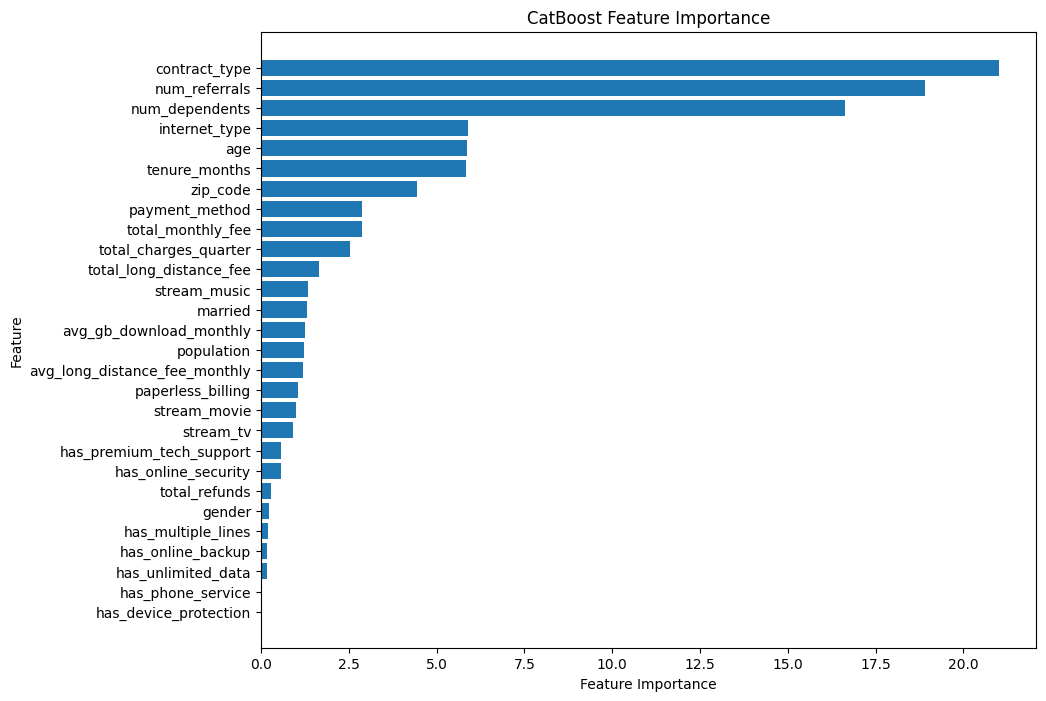

In [56]:
feature_importances = cat_model.get_feature_importance()
sorted_indices = np.argsort(feature_importances)[::-1]

# Sort the feature importances and feature names
sorted_feature_importances = feature_importances[sorted_indices]
sorted_features = X.columns[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

From the feature importance above, we decided to use these features:
1. contract_type
2. num_referrals
3. num_dependents
4. internet_type
5. age
6. tenure_months
7. zip_code
8. payment_method
9. total_monthly_fee
10. married

In [57]:
# Set X
X = df[["contract_type",
    "num_referrals",
    "num_dependents",
    "internet_type",
    "age",
    "tenure_months",
    "zip_code",
    "payment_method",
    "total_monthly_fee",
    "married"]]

Now let's perform hyperparameter tuning using GridSearch.

We run GridSearch as an iterative process using small batches to optimize limited resources.

In [58]:
cat_features = list(X.select_dtypes(include=['object']).columns)

cat_model = CatBoostClassifier(cat_features=cat_features, random_seed=42, verbose=0)

In [59]:
params = {
    'learning_rate': [0.05, 0.07, 0.1],
    'depth': [3, 4],
    'iterations': [500],
    'l2_leaf_reg': [3],
    'border_count': [32, 64],
    'bagging_temperature': [0.0],
    'random_strength': [0.5, 1.0]
}

In [60]:
gs = GridSearchCV(
    estimator = cat_model,
    param_grid = params,
    scoring = 'roc_auc',
    cv = 5
)
gs.fit(X, y)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000029A23B9A410>,
             param_grid={'bagging_temperature': [0.0], 'border_count': [32, 64],
                         'depth': [3, 4], 'iterations': [500],
                         'l2_leaf_reg': [3], 'learning_rate': [0.05, 0.07, 0.1],
                         'random_strength': [0.5, 1.0]},
             scoring='roc_auc')

In [62]:
# Examine best parameters and best AUC score
print(f"Best parameters: {gs.best_params_}")
print(f"Best AUC score: {gs.best_score_}")

Best parameters: {'bagging_temperature': 0.0, 'border_count': 64, 'depth': 3, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.07, 'random_strength': 1.0}
Best AUC score: 0.9148089691223802


## 3.3 Model Comparison

| Model          | AUC Train Score |
|:--------------:|:---------------:|
| XGBoost Tuned  |      0.9110     |
| Catboost Tuned |      0.9148     |



From the table above, we can conclude that our catboost model is better.  
We will proceed to re-train the X and y with the best params.

## 3.4 Re-run Catboost

In [63]:
catboost_model = CatBoostClassifier(random_seed=42, cat_features=cat_features, depth=3, iterations=500, learning_rate=0.07, bagging_temperature=0, border_count=64, random_strength=1, l2_leaf_reg=3)

In [64]:
catboost_model.fit(X, y)

0:	learn: 0.6340759	total: 15.9ms	remaining: 7.92s
1:	learn: 0.5903659	total: 39.5ms	remaining: 9.82s
2:	learn: 0.5630921	total: 54.3ms	remaining: 9s
3:	learn: 0.5375056	total: 69.7ms	remaining: 8.65s
4:	learn: 0.5176579	total: 83.1ms	remaining: 8.23s
5:	learn: 0.4961174	total: 97.7ms	remaining: 8.04s
6:	learn: 0.4782981	total: 111ms	remaining: 7.8s
7:	learn: 0.4617362	total: 125ms	remaining: 7.67s
8:	learn: 0.4521974	total: 142ms	remaining: 7.77s
9:	learn: 0.4443101	total: 157ms	remaining: 7.68s
10:	learn: 0.4367611	total: 173ms	remaining: 7.68s
11:	learn: 0.4292827	total: 187ms	remaining: 7.6s
12:	learn: 0.4228745	total: 204ms	remaining: 7.65s
13:	learn: 0.4181669	total: 220ms	remaining: 7.62s
14:	learn: 0.4134761	total: 235ms	remaining: 7.6s
15:	learn: 0.4084740	total: 251ms	remaining: 7.6s
16:	learn: 0.4031458	total: 268ms	remaining: 7.61s
17:	learn: 0.3993301	total: 282ms	remaining: 7.56s
18:	learn: 0.3940821	total: 297ms	remaining: 7.52s
19:	learn: 0.3902555	total: 311ms	remainin

# 4. Export Model

Next, we will export our best model as a .pkl file.

In [65]:
import joblib

In [66]:
# Export model as .pkl file.
joblib.dump(catboost_model, '../models/catboost_model.pkl')

['../models/catboost_model.pkl']